In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import regex as re 

In [15]:
sns.set_theme(style="darkgrid")

In [22]:
def normalize_names(string):
    return string.replace("org.tastytruffle.benchmarks.ListBenchmark.benchmarkGraal", "List.") \
                 .replace("org.tastytruffle.benchmarks.ResizableArrayBenchmark.benchmarkGraal", "ArrayBuffer.") \
                 .replace("org.tastytruffle.benchmarks.ListBenchmark.benchmarkTruffle", "List.") \
                 .replace("org.tastytruffle.benchmarks.ResizableArrayBenchmark.benchmarkTruffle", "ArrayBuffer.")

def extract_types(string):
    pattern = r'^(List|ArrayBuffer)\.(Int|Long|Double)(.+)$'
    match = re.fullmatch(pattern, string)
    return match[2]

def drop_types_from_name(string):
    pattern = r'^(List|ArrayBuffer)\.(Int|Long|Double)(.+)$'
    match = re.fullmatch(pattern, string)
    return match[1] + '.' + match[3]

def canonicalize(df):
    df['Benchmark'] = df['Benchmark'].apply(normalize_names)
    df['Type'] = df['Benchmark'].apply(extract_types)
    df['Benchmark'] = df['Benchmark'].apply(drop_types_from_name)
    return df

In [47]:
data = [
    ("graal_results.csv", "Graal"),
    ("unspecialized_results.csv", "Unspecialized Truffle"),
    ("specialized_results.csv", "Specialized Truffle")
]

graal_csv = pd.read_csv("graal_results.csv")
canonicalize(graal_csv)

filt = graal_csv['Benchmark']=="List.contains"
graal_csv['Origin'] = 'Graal'
print(graal_csv)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 4 (1517319561.py, line 5)

[None]

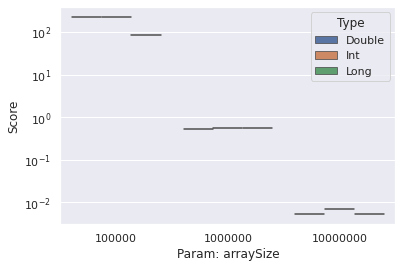

In [45]:
splot = sns.boxenplot(
    data=graal_csv[graal_csv.Benchmark.eq("List.Contains")], 
    x='Param: arraySize', 
    y='Score', 
    hue='Type')

splot.set(yscale="log")